# Analysing the factors effecting the frequency and duration of bike rental.

## Investigation Overview:
In this investigation, I want to look at how factors such as age group, gender, user type and whether the start station and end station are same will influence the frequency of bike rental and duration taken

## Dataset overview:
The original dataset consists of duration,start time, end time, information about start station and end station,latitude,longitude,bike id,user type,member birth year and member gender. 

Columns consisting of categorical variables such as age,age group and whether the start station and end station are same are added to the dataset to have a deeper analysis.Age is calculated by subtracting 2017 from member birth year.The age group is categorised as young who are less than or equal to 30,middle aged who are between 30 and 50 and old who are greater than 50.'start=end' column is included to categorize whether the start station being equal to the end station is true or false by comparing the station ids.

## Data cleaning and adding columns:
The dataset is cleaned and the columns mentioned are added

In [1]:
#Required Libraries are imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime
% matplotlib inline 

In [4]:
#The dataset is loaded and read
df1=pd.read_csv('2017-fordgobike-tripdata.csv')

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [7]:
#Data cleaning and addition of new columns
df2=df1.dropna(axis=0)
df2['member_birth_year']=df2['member_birth_year'].astype(int)
df2['age']=2017-df2['member_birth_year']
df2=df2.drop(index=425817,axis=0)
df2=df2.drop(index=426608,axis=0)
df2['start=end']=np.where(df2['start_station_id']==df2['end_station_id'],'True','False')
df2.loc[(df2['age']>30) & (df2['age']<=50),'age_group']='middleage'
df2.loc[df2['age']>50,'age_group']='old'
df2.loc[df2['age']<=30,'age_group']='young'

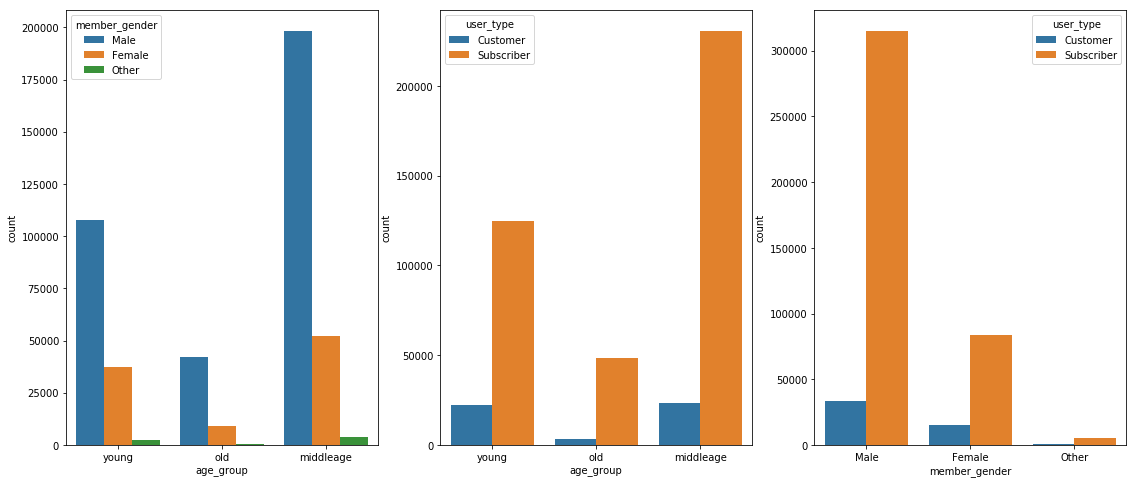

In [8]:
#Counting the number of people based on gender and age group.
plt.figure(figsize=[19,8])
plt.subplot(1,3,1)
sb.countplot(data=df2,x='age_group',hue='member_gender')
plt.subplot(1,3,2)
sb.countplot(data=df2,x='age_group',hue='user_type')
plt.subplot(1,3,3)
sb.countplot(data=df2,x='member_gender',hue='user_type')

***It is found that the users are mostly middleaged men who are subscribers***

(-50, 5000)

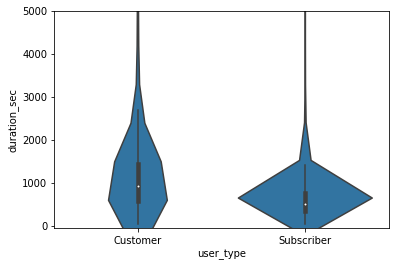

In [9]:
#Checking the median of both the user types
color_default=sb.color_palette()[0]
sb.violinplot(data=df2,x='user_type',y='duration_sec',color=color_default)
plt.ylim(-50,5000)

***It is interesting to note that the median duration taken by subscribers is much less than the customers.And also the probability density of subscribers and customers are high at around 800 sec. *** 

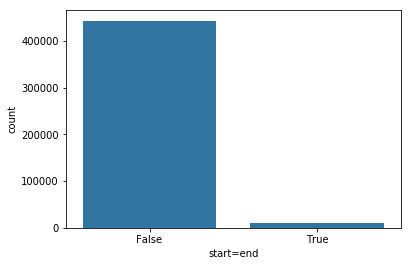

In [10]:
#Countplot is plotted to find the number of people who choose the same end station as the start station.
sb.countplot(data=df2,x='start=end',color=sb.color_palette()[0])

***From the countplot it has been found that considerably a large number of people don't choose the same end station and start station***

([<matplotlib.axis.YTick at 0x16d866fc860>,
 <a list of 34 Text yticklabel objects>)

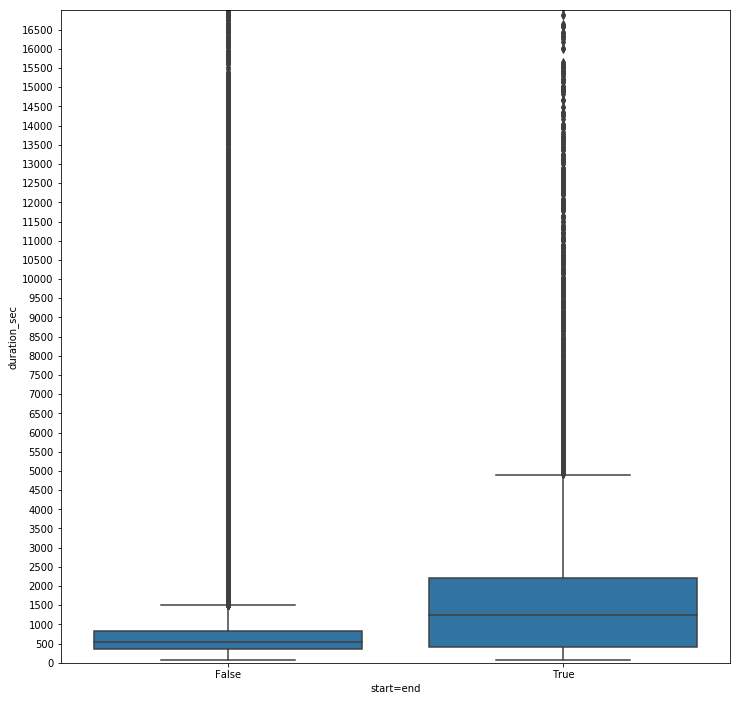

In [20]:
#Checking the median and outlier 
plt.figure(figsize=[12,12])
base_color=sb.color_palette()[0]
sb.boxplot(data=df2,x='start=end',y='duration_sec',color=base_color);
plt.ylim(0,17000)
plt.yticks(np.arange(0,17000,500))

***The median duration of users who drop the bike in same station is higher,inspite of the frequency being lower.This can be attributed to outliers.***

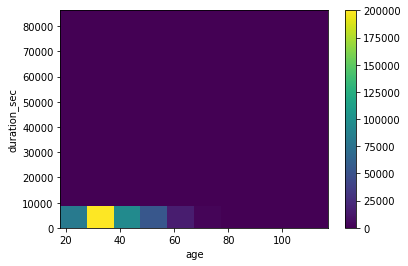

In [14]:
#A heatmap is plotted to further identify the correlation between age and duration  
plt.hist2d(data=df2,x='age',y='duration_sec')
plt.ylabel('duration_sec')
plt.xlabel('age')
plt.colorbar()

***It is found that users from age 30-38 correlated to the duration taken have highest density.***

## Conclusion:
It has been found that a large section of users are middle-aged men who are subscribers followed by young men who are subscribers.Most of the users don't drop the bikes at the same station as to where they start irrespective of their gender, user type and age group.Meanwhile the median and mean duration of users whose end station and start station are same is higher than the duration of users where both the stations are not the same.This can be attributed to the presence of many outliers.Though the number of subscribers are more than the customers, median and mean frequency of customers is higher.The correlation of frequency and duration is the same with whether the start station and end station or not i.e. negative irrespective of where the bike is dropped.Most of the users are particularly between the age of 30-38 who take within 10000 secs. 